In [1]:
# Mount Google Drive
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# set data paths
root_dir = "gdrive/My Drive/Master_Thesis/"
data_dir = os.path.join(root_dir, 'data/')
Sexist_dir = os.path.join(data_dir, 'Custom/EDOS_sexist.csv')
CONANtrain_dir = os.path.join(data_dir, 'Custom/CONAN_train.csv')
CONANtest_dir = os.path.join(data_dir, 'Custom/CONAN_test.csv')
Qian_gab_dir = os.path.join(data_dir, 'Qian/gab.csv')
Qian_reddit_dir = os.path.join(data_dir, 'Qian/reddit.csv')
CONAN_dir = os.path.join(data_dir, 'CONAN/CONAN.csv')
Multitarget_CONAN_dir = os.path.join(data_dir, 'Multitarget-CONAN/Multitarget-CONAN.csv')
DIALO_CONAN_dir = os.path.join(data_dir, 'DIALOCONAN/DIALOCONAN.csv')
KN_CONAN_dir = os.path.join(data_dir, 'multitarget_KN_grounded_CN/multitarget_KN_grounded_CN.csv')

In [5]:
Sex_train = os.path.join(data_dir, 'Custom/Topic-classification_train.csv')
Sex_test = os.path.join(data_dir, 'Custom/Topic-classification_test.csv')

In [6]:
Sex_train= pd.read_csv(Sex_train)
Sex_test= pd.read_csv(Sex_test)

In [7]:
Sex_train

,Dataset,Row ID,text,TARGET,MIGRANTS,POC,LGBT+,MUSLIMS,WOMEN,JEWS,other,DISABLED
0,DIALO_CONAN_Counterspeech,944,That intolerance and hatred is one of the bigg...,['MUSLIMS'],0,0,0,1,0,0,0.0,0.0
1,DIALO_CONAN_Counterspeech,5394,Why would you say this about a religion?,['MUSLIMS'],0,0,0,1,0,0,0.0,0.0
2,DIALO_CONAN_Counterspeech,7424,Why do you think this is right? Women are huma...,['WOMEN'],0,0,0,0,1,0,0.0,0.0
3,DIALO_CONAN_Counterspeech,4539,"If you're really worried about women's rights,...",['LGBT+'],0,0,1,0,0,0,0.0,0.0
4,DIALO_CONAN_Counterspeech,4789,All people have a right to life regardless of ...,['POC'],0,1,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11977,DIALO_CONAN_Counterspeech,5731,How would you explain the systematic persecuti...,['JEWS'],0,0,0,0,0,1,0.0,0.0
11978,Multi_CONAN_Counterspeech,359,"To be honest, there are already programs that ...",MIGRANTS,1,0,0,0,0,0,0.0,0.0
11979,DIALO_CONAN_Counterspeech,862,The religion of millions of people is not inco...,['MUSLIMS'],0,0,0,1,0,0,0.0,0.0
11980,DIALO_CONAN_Counterspeech,5415,How can Jews be a curse to the world when they...,['JEWS'],0,0,0,0,0,1,0.0,0.0


In [8]:
Sex_test

,Dataset,Row ID,text,TARGET,MIGRANTS,POC,LGBT+,MUSLIMS,WOMEN,JEWS,other,DISABLED
0,DIALO_CONAN_Counterspeech,1008,"Although some may deny it, the anti-Muslim pre...",['MUSLIMS'],0,0,0,1,0,0,0.0,0.0
1,DIALO_CONAN_Counterspeech,7292,You could use some background information to h...,['POC'],0,1,0,0,0,0,0.0,0.0
2,DIALO_CONAN_Counterspeech,1142,According to this study [link] almost 1 millio...,['JEWS'],0,0,0,0,0,1,0.0,0.0
3,DIALO_CONAN_Counterspeech,1934,I like all kinds of people. Whether or not you...,['LGBT+'],0,0,1,0,0,0,0.0,0.0
4,Multi_CONAN_Counterspeech,1794,Women are not subhuman and cannot be reduced t...,WOMEN,0,0,0,0,1,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1327,Multi_CONAN_Counterspeech,4979,Since when is it OK to discriminate against pe...,POC,0,1,0,0,0,0,0.0,0.0
1328,DIALO_CONAN_Counterspeech,6695,Trans people shouldn't be treated like crimina...,['LGBT+'],0,0,1,0,0,0,0.0,0.0
1329,DIALO_CONAN_Counterspeech,3255,Researchers rule out that it is caused by immi...,['MIGRANTS'],1,0,0,0,0,0,0.0,0.0
1330,DIALO_CONAN_Counterspeech,1158,"This is not true, we should make immigrants fe...",['MIGRANTS'],1,0,0,0,0,0,0.0,0.0


# CONAN

In [ ]:
# Read csv file into dataframe
CONAN_raw= pd.read_csv(CONAN_dir)
Multitarget_CONAN_raw= pd.read_csv(Multitarget_CONAN_dir)
DIALO_CONAN_raw= pd.read_csv(DIALO_CONAN_dir)

In [ ]:
CONAN_train= pd.read_csv(CONANtrain_dir)
CONAN_test= pd.read_csv(CONANtest_dir)

In [ ]:
CONAN_test

,Dataset,Row ID,Hate_Speech,Counter_Speech,Target,Target_2
0,DIALO_CONAN,711,We are destined to fail as a people because of...,Jews have been responsible for the important t...,JEWS,NaN
1,DIALO_CONAN,2654,Women are little more than objects to be domin...,"Women are people, and they are to be treated e...",WOMEN,NaN
2,Multi_CONAN,1016,"Afrocentricity is a force of black oppression,...","First of all, you have to understand that ever...",POC,NaN
3,CONAN,3577,Since 2000 there were 5248 suicide bombings an...,And pipe bombs were sent to Trump's opposition...,Islamophobia,terrorism
4,DIALO_CONAN,2668,All gay people are criminals.,"Homosexuality is not a crime, it is an individ...",LGBT+,NaN
...,...,...,...,...,...,...
2381,CONAN,2924,Islam corrupts our children in schools and thi...,Maybe if you'd learned about Islam in school y...,Islamophobia,islamization
2382,Multi_CONAN,438,It is not a coincidence that tuberculosis reap...,"The trend in Italy remains particularly low, l...",MIGRANTS,NaN
2383,CONAN,3264,Another rapist from Pakistan. We should deport...,"Except the ones that diagnosed my illness, tak...",Islamophobia,rapism
2384,DIALO_CONAN,2616,Now we know that Islam is a destructive and vi...,"We can not link Islam and terrorism together, ...",MUSLIMS,NaN


In [ ]:
subtypes = CONAN_raw["hsSubType"].unique()
types = CONAN_raw["hsType"].unique()

In [ ]:
types

array(['Islamophobia'], dtype=object)

In [ ]:
subtypes

array(['crimes', 'crimes , culture', 'crimes , culture , rapism',
       'crimes , culture , women', 'crimes , rapism',
       'crimes , rapism , terrorism', 'culture', 'culture , generic',
       'culture , islamization', 'culture , women', 'economics',
       'generic', 'islamization', 'islamization , rapism', 'rapism',
       'rapism , terrorism', 'terrorism', 'women', 'crimes , women',
       'culture , terrorism', 'islamization , terrorism',
       'islamization , women', 'rapism , women'], dtype=object)

In [ ]:
df_raw["Target"] = df_raw["Target"].replace("Islamophobia", "MUSLIMS")
df_raw_test["Target"] = df_raw_test["Target"].replace("Islamophobia", "MUSLIMS")

In [ ]:
selection = ['DISABLED', 'MIGRANTS', 'LGBT+', 'JEWS', 'WOMEN', 'POC', 'MUSLIMS', 'other']

In [ ]:
df_select = df_raw.loc[df_raw['Target'].isin(selection)]
df_test_select = df_raw_test.loc[df_raw_test['Target'].isin(selection)]

DISABLED 175
MIGRANTS 1203
LGBT+ 953
JEWS 847
WOMEN 882
POC 686
MUSLIMS 4572
other 217


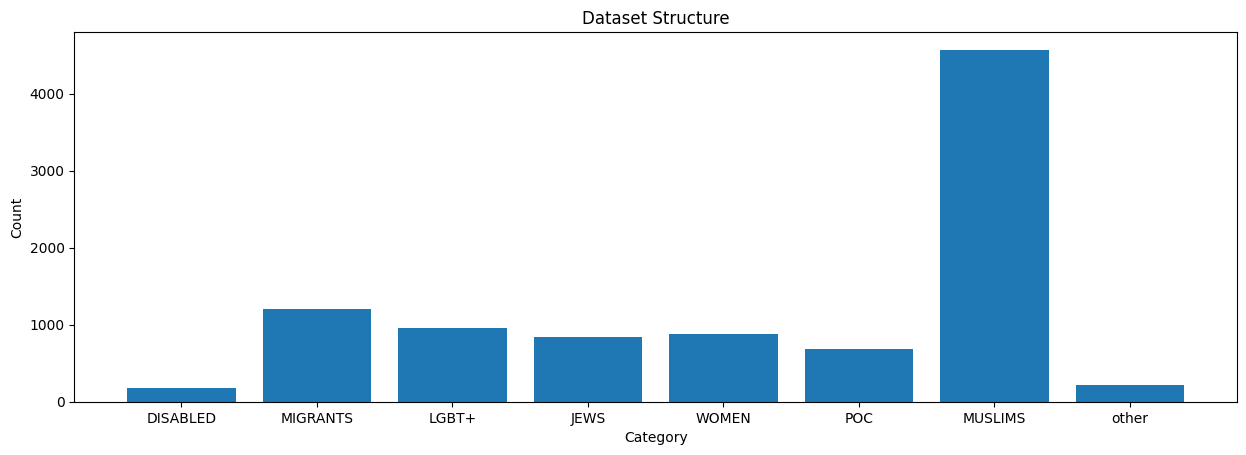

In [ ]:
count = []
for tp in selection:
  ct = df_select["Target"].value_counts()[tp]
  count.append(ct)
  print(tp, ct)

plt.figure().set_figwidth(15)
plt.bar(selection, count)
plt.title('Dataset Structure')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

DISABLED 45
MIGRANTS 288
LGBT+ 255
JEWS 215
WOMEN 242
POC 159
MUSLIMS 1132
other 49


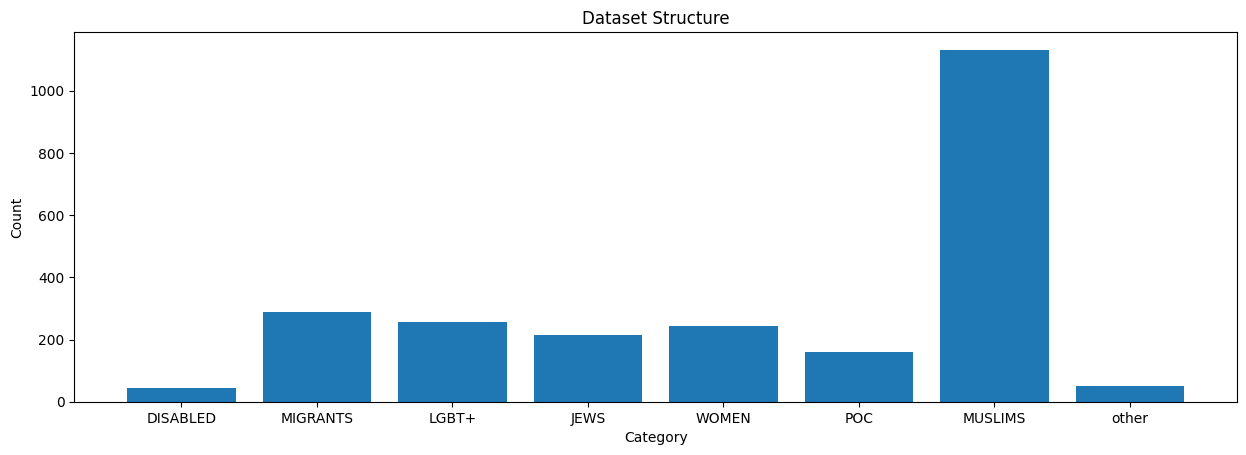

In [ ]:
count = []
for tp in selection:
  ct = df_test_select["Target"].value_counts()[tp]
  count.append(ct)
  print(tp, ct)

plt.figure().set_figwidth(15)
plt.bar(selection, count)
plt.title('Dataset Structure')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [ ]:
selection = ['WOMEN']
temp = []
for tp in selection:
  df = df_raw.loc[df_raw['Target'] == tp]
  temp.append(df.sample(n = 10))

In [ ]:
data_dir = os.path.join(root_dir, 'data/')
save_dir = os.path.join(data_dir, 'Custom/')

os.makedirs(save_dir, exist_ok=True)
df_sexist.to_csv(save_dir + "CONAN_Sexist_test.csv")
df_sexist_.to_csv(save_dir + "Human_NAN_SEXIST_NAN.csv")

Sexism - Human evaluation

In [ ]:
Sexist_dir = os.path.join(data_dir, 'Custom/EDOS_sexist.csv')
Sexist_test= pd.read_csv(Sexist_dir)

In [ ]:
Sexist_test

,Unnamed: 0,text,labels
0,6,[USER] Leg day is easy. Hot girls who wear min...,sexist
1,8,I get a new pussy every other week or whenever...,sexist
2,9,I agree with that but at the same time I know ...,sexist
3,14,O come on there's no way any men are attracted...,sexist
4,15,democrats from Minnesota (leftist muzzie shith...,sexist
...,...,...,...
4849,19983,This is easily the dumbest thing ever written....,sexist
4850,19984,Recently some thots started advertizing their ...,sexist
4851,19986,I wish yall understand what a burden it can be...,sexist
4852,19992,idiocracy always seems to be female. Best evid...,sexist


In [ ]:
temp = []
temp.append(Sexist_test.sample(n = 50))

In [ ]:
df_new = temp[0]
for i in range(len(temp)-1):
  df_new = pd.concat(
    [df_new, temp[i+1]],
    sort=False)

In [ ]:
df_new = df_new.reset_index()
df_new = df_new.drop('index', axis=1)
df_new = df_new.drop('Unnamed: 0', axis=1)
df_new = df_new.drop("labels", axis=1)
df_new = df_new.rename(columns={'text': 'Hate_Speech'})

In [ ]:
df_new

In [ ]:
import glob

pred_dir = os.path.join(root_dir, "predictions/Sexism/")
# read names of all prediction files
files = glob.glob(pred_dir + "*.csv")
temp=df_new.copy()
for f in files:
  df = pd.read_csv(f)
  df = df.drop("Unnamed: 0", axis=1)
  df = df.drop("Unnamed: 0.1", axis=1)
  df = df.drop("labels", axis=1)
  file_name = f.replace(pred_dir, "")
  model_name = file_name.replace(".csv", "").split("_")[0]

  temp = temp.merge(df, how="left", on=["Hate_Speech"])
  temp = temp.rename(columns={'Prediction': model_name})


temp = temp.drop("Target", axis=1)
temp = temp.drop("Target_2", axis=1)
temp = temp.drop("Label", axis=1)

data_dir = os.path.join(root_dir, 'predictions/')
save_dir = os.path.join(data_dir, 'human_evaluation/')

os.makedirs(save_dir, exist_ok=True)
temp.to_csv(save_dir + "sheet.csv")

In [ ]:
temp

,Hate_Speech,gpt2-medium,bart-large,CounterGeDI,GPS,gpt2-medium-category
0,But the law counts the teen girls that run awa...,The law does not specifically prohibit the enf...,The law counts only those cases where a woman ...,"[""Islam is a violent religion and every Muslim...",Please also notice that huge numbers of girls ...,"If you really cared about sex workers, you wou..."
1,All her friends know divorce attorneys. Roastie,"She has friends who are divorce lawyers, and t...",That sounds like a stereotype. What do you mea...,"[""It's true that some people have been success...","We're all humans, so we're all brothers and si...",I don't think divorce is a bad thing. I think ...
2,"I think this is unfair, snowstorms are rarely ...","In fact, in many parts of the world, such as i...",That is not what I observe from the many snowy...,['Muslims have no place in civilised Europe. T...,i don't understand how women should be a part ...,<MUSLIMS>-hats off to those women who actually...
3,Slapping a bitch is quite rewarding. He needs ...,Did you know that punching someone in the face...,That was quite a'slap' to the face. Should I t...,['Gays are sick. They should be isolated and i...,"I saw that bit of news, nothing to do with the...",You can't blame a woman for wanting to be trea...
4,"It will be due to ""Mental Illness"". Not becaus...","She's not evil, she's just suffering from a me...",Mental illness is not a cause and effect relat...,['Islam is a death cult and every Muslim shoul...,Accepting people from all walks of life is not...,"Women are not inherently evil, nor are they in..."
5,Just fucking lol. What does she know about a h...,She is a human being with a right to live her ...,Being subhuman is not a choice. It is a fact o...,"[""I'm not sure I follow you on this one. Can y...",to assert that there is a problem for all kind...,ive met so many intelligent and hard working w...
6,The day your pure breed mare gets humped by a ...,Maybe it's not a bad idea to talk to your new ...,That's not true. A horse's sire does not decid...,"[""Why should I walk away from someone because ...",Imagine that someone were to tell you that you...,If a woman does not want to be a wife or mothe...
7,"Social media is to women, what porn is to men.",Online harassment is a problem all around the ...,Social media is to women what porn is to men.,"[""I don't know about you, but I'd rather have ...",this is not true. feminism is a social empower...,"Pornography is a form of entertainment, and me..."
8,"April 25, 2018 whore (n) Prostitute. Person co...","Hate-speech: April 25, 2018 whore (n) Prostitu...",I'm not sure what you're talking about. Kamala...,"[""We need to stop migrants and ban them from E...",Anita Hill is a survivor of a sexist and racis...,ive never heard of her being a 'prostitute' be...
9,"It's the advanced version of the ""let's take a...",In the real world there are many different emp...,"It's the advanced version of the ""let's take a...","[""This is not about Islam or Muslims, this is ...",this is not true. let's have the social negati...,The idea that the only way to cope with the cr...
